

---



**Material Properties**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Face sheet (subscript f)

rho_f = 1570 #[kg/m^3]
E_f = 46E9 #[Pa]
sigma_f = 550E6 #[Pa]

#Core (subscript c)

rho_c = 200 #[kg/m^3]
E_c = 0.255E9 #[Pa]
sigma_c = 6.8E6 #[Pa]
tau_c = 3.4E6 #[Pa] Shear Strength
nu_c = 0.2

G_c = E_c/(2*(1+nu_c)) #[Pa] Shear Modulus

#Loading Conditions

B_1 = 384/5
B_2 = 8
B_3 = 8
B_4 = 2



---

**Functions for Problems 1 and 2**

In [8]:
def sand_E_eff_fun(f,doL):
  return (1/(E_f*((1-(1-f)**3)+(E_c/E_f)*(1-f)**3))+(B_1/B_2)*(doL)**2*((1-f)/G_c))**(-1)

def sand_rho_fun(f):
  return f*rho_f+(1-f)*rho_c

def mat_index_fun(f,doL):
  sand_E_eff = sand_E_eff_fun(f,doL)
  sand_rho = sand_rho_fun(f)
  return sand_E_eff**(1/3)/sand_rho





---


**Problem 1**

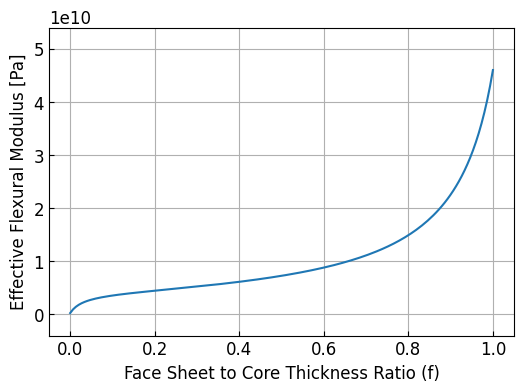

Maximum value: 5.395853338927671
Location of maximum: 0.0287669583254247


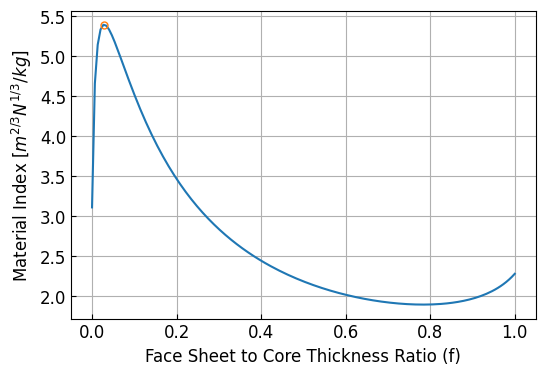

In [9]:
from scipy.optimize import minimize_scalar

f = np.linspace(0, 1, 150)
doL = 0.05 #The ratio of d over L

sand_E_eff = sand_E_eff_fun(f,doL)

  #(1/(E_f*((1-(1-f)**3)+(E_c/E_f)*(1-f)**3))+(B_1/B_2)*(doL)**2*((1-f)/G_c))**(-1)

#>>> Plot For Part 1

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.plot(f,sand_E_eff,'-')


plt.xlabel("Face Sheet to Core Thickness Ratio (f)")
plt.ylabel("Effective Flexural Modulus [Pa]")
#plt.legend(loc="upper left")
plt.grid()
plt.gcf().set_size_inches(6, 4)  # Set the size of the figure in inches (width, height)
plt.ylim(-0.4E10, 5.4E10)  # Adjust the range as needed
# Save the plot
plt.savefig('Problem_1_a.png', dpi=300, bbox_inches = "tight")  # Save the plot as 'plot.png' with 300 DPI

plt.show()

#>>>>>>>> Second Part -> Find Maximum Index

sand_rho = sand_rho_fun(f)

mat_index = mat_index_fun(f,doL)

# Find the maximum of the function
result = minimize_scalar(lambda f: -mat_index_fun(f,doL))

# Print the result
print("Maximum value:", -result.fun)
print("Location of maximum:", result.x)

f_max_index_1 = result.x

plt.plot(f,mat_index,'-')
plt.plot(result.x,-result.fun, marker='o', markerfacecolor='none', markersize=5)

plt.xlabel("Face Sheet to Core Thickness Ratio (f)")
plt.ylabel("Material Index [${m^{2/3}N^{1/3}}/{kg}$]")
#plt.legend(loc="upper left")
plt.grid()
plt.gcf().set_size_inches(6, 4)  # Set the size of the figure in inches (width, height)
#plt.ylim(-0.4E10, 5.4E10)  # Adjust the range as needed
# Save the plot
plt.savefig('Problem_1_b.png', dpi=300, bbox_inches = "tight")  # Save the plot as 'plot.png' with 300 DPI

plt.show()




---


**Problem 2**

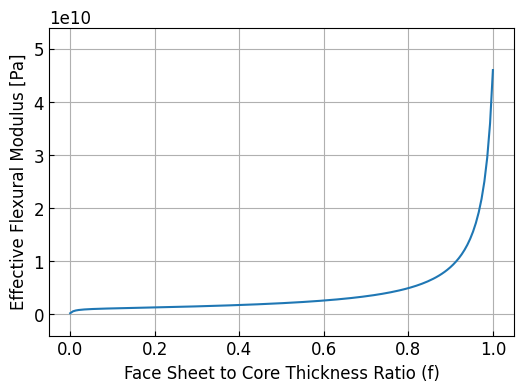

Maximum value: 4.125659008141342
Location of maximum: 0.015770654409177635


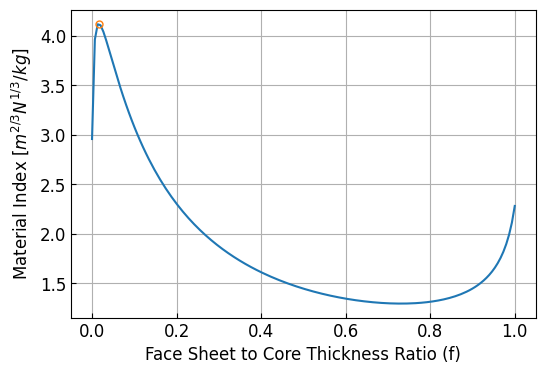

In [10]:
from scipy.optimize import minimize_scalar

f = np.linspace(0, 1, 150)
doL = 0.1 #The ratio of d over L

sand_E_eff = sand_E_eff_fun(f,doL)

  #(1/(E_f*((1-(1-f)**3)+(E_c/E_f)*(1-f)**3))+(B_1/B_2)*(doL)**2*((1-f)/G_c))**(-1)

#>>> Plot For Part 1

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.plot(f,sand_E_eff,'-')


plt.xlabel("Face Sheet to Core Thickness Ratio (f)")
plt.ylabel("Effective Flexural Modulus [Pa]")
#plt.legend(loc="upper left")
plt.grid()
plt.gcf().set_size_inches(6, 4)  # Set the size of the figure in inches (width, height)
plt.ylim(-0.4E10, 5.4E10)  # Adjust the range as needed
# Save the plot
plt.savefig('Problem_2_a.png', dpi=300, bbox_inches = "tight")  # Save the plot as 'plot.png' with 300 DPI

plt.show()

#>>>>>>>> Second Part -> Find Maximum Index

sand_rho = sand_rho_fun(f)

mat_index = mat_index_fun(f,doL)

# Find the maximum of the function
result = minimize_scalar(lambda f: -mat_index_fun(f,doL))

# Print the result
print("Maximum value:", -result.fun)
print("Location of maximum:", result.x)

f_max_index_2 = result.x

plt.plot(f,mat_index,'-')
plt.plot(result.x,-result.fun, marker='o', markerfacecolor='none', markersize=5)

plt.xlabel("Face Sheet to Core Thickness Ratio (f)")
plt.ylabel("Material Index [${m^{2/3}N^{1/3}}/{kg}$]")
#plt.legend(loc="upper left")
plt.grid()
plt.gcf().set_size_inches(6, 4)  # Set the size of the figure in inches (width, height)
#plt.ylim(-0.4E10, 5.4E10)  # Adjust the range as needed
# Save the plot
plt.savefig('Problem_2_b.png', dpi=300, bbox_inches = "tight")  # Save the plot as 'plot.png' with 300 DPI

plt.show()




---


**Problem 3**

In [11]:
def sand_sigma_1_fun(f,sigma_f,sigma_c):
  return (1-(1-f)**2)*sigma_f+(1-f)**2*sigma_c

def sand_sigma_2_fun(f,E_f,E_c):
  return 2.28*f*(1-f)*(E_f*E_c**2)**(1/3)

def sand_sigma_3_fun(f,sigma_f,tau_c,doL,B_3,B_4):
  return (B_4/B_3)*(4*(1/doL)*(1-f)*tau_c+f**2*sigma_f)

In [12]:
from prettytable import PrettyTable

doL_1 = 0.05
doL_2 = 0.1

#Problem 1

sand_sigma_1_1 = sand_sigma_1_fun(f_max_index_1,sigma_f,sigma_c)
sand_sigma_2_1 = sand_sigma_2_fun(f_max_index_1,E_f,E_c)
sand_sigma_3_1 = sand_sigma_3_fun(f_max_index_1,sigma_f,tau_c,doL_1,B_3,B_4)

#Problem 2

sand_sigma_1_2 = sand_sigma_1_fun(f_max_index_2,sigma_f,sigma_c)
sand_sigma_2_2 = sand_sigma_2_fun(f_max_index_2,E_f,E_c)
sand_sigma_3_2 = sand_sigma_3_fun(f_max_index_2,sigma_f,tau_c,doL_2,B_3,B_4)

# Create a new table
table = PrettyTable()

# Define column labels
table.field_names = ["Mechanism", "Problem 1", "Problem 2"]

# Define row labels and numbers
row_labels = ["Face Sheet Yeilding", "Face Sheet Buckling", "Core Failure"]
numbers = [
    [sand_sigma_1_1, sand_sigma_1_2],
    [sand_sigma_2_1, sand_sigma_2_2],
    [sand_sigma_3_1, sand_sigma_3_2]
]

# Add data to the table
for row_label, row_numbers in zip(row_labels, numbers):
    table.add_row([row_label] + row_numbers)

# Print the table
print(table)

+---------------------+-------------------+--------------------+
|      Mechanism      |     Problem 1     |     Problem 2      |
+---------------------+-------------------+--------------------+
| Face Sheet Yeilding | 37602904.94218905 | 23798137.754934452 |
| Face Sheet Buckling | 91783575.26741539 | 50991008.61365763  |
|     Core Failure    | 66157633.29392442 | 33497995.861905843 |
+---------------------+-------------------+--------------------+
